In [74]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_error
import h2o
from h2o.automl import H2OAutoML

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [75]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: generate_datasets.ipynb
  File: generate_dataset_hgb.ipynb
  File: generate_dataset_automl.ipynb
  File: generate_dataset_automl copy.ipynb
  File: generate_dataset_gradboost.ipynb
  File: gradboost_testing_features.ipynb


In [76]:
# pv_measurement for all training and validation rows
a_targets = pd.read_parquet('../data/A/train_targets.parquet')
b_targets = pd.read_parquet('../data/B/train_targets.parquet')
c_targets = pd.read_parquet('../data/C/train_targets.parquet')

# validation sets
X_train_estimated_a = pd.read_parquet('../data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../data/C/X_train_estimated.parquet')

# training sets
X_train_observed_a = pd.read_parquet('../data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../data/C/X_train_observed.parquet')

#test sets
X_test_estimated_a = pd.read_parquet('../data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../data/C/X_test_estimated.parquet')

### Groups the rows with the same hour for location A

In [77]:
df = X_test_estimated_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_A = df


df = X_train_observed_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_A = df


df = X_train_estimated_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_A = df

### Groups the rows with the same hour for location B

In [78]:
df = X_test_estimated_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_B = df


df = X_train_observed_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_B = df


df = X_train_estimated_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_B = df

### Groups the rows with the same hour for location C

In [79]:
df = X_test_estimated_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_C = df


df = X_train_observed_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_C = df


df = X_train_estimated_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_C = df

#### Merging the training and validation set with the targets sets such that pv_measurement is added

In [80]:
training_A = training_A.merge(a_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_A.drop('time', axis=1, inplace=True)

training_B = training_B.merge(b_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_B.drop('time', axis=1, inplace=True)

training_C = training_C.merge(c_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_C.drop('time', axis=1, inplace=True)

validation_A = validation_A.merge(a_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_A.drop('time', axis=1, inplace=True)

validation_B = validation_B.merge(b_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_B.drop('time', axis=1, inplace=True)

validation_C = validation_C.merge(c_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_C.drop('time', axis=1, inplace=True)

Training B har 4 nan's for pv_m. Training C har 6000 nan's for pv_m

In [81]:
training_A['pv_measurement'] = training_A['pv_measurement'].replace(-0.0, 0.0)
training_B['pv_measurement'] = training_B['pv_measurement'].replace(-0.0, 0.0)
training_C['pv_measurement'] = training_C['pv_measurement'].replace(-0.0, 0.0)
validation_C['pv_measurement'] = validation_C['pv_measurement'].replace(-0.0, 0.0)
validation_A['pv_measurement'] = validation_A['pv_measurement'].replace(-0.0, 0.0)
validation_B['pv_measurement'] = validation_B['pv_measurement'].replace(-0.0, 0.0)

#### Plotting pv_measurement for all dataframes

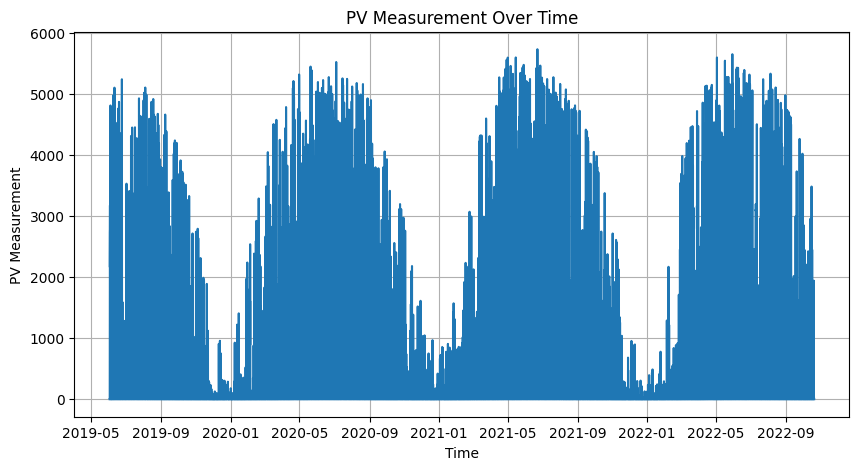

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(training_A['date_forecast'], training_A['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

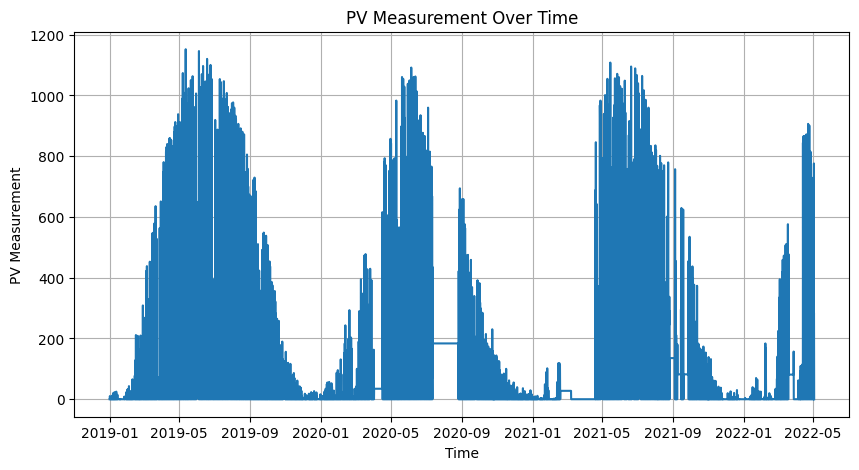

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(training_B['date_forecast'], training_B['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

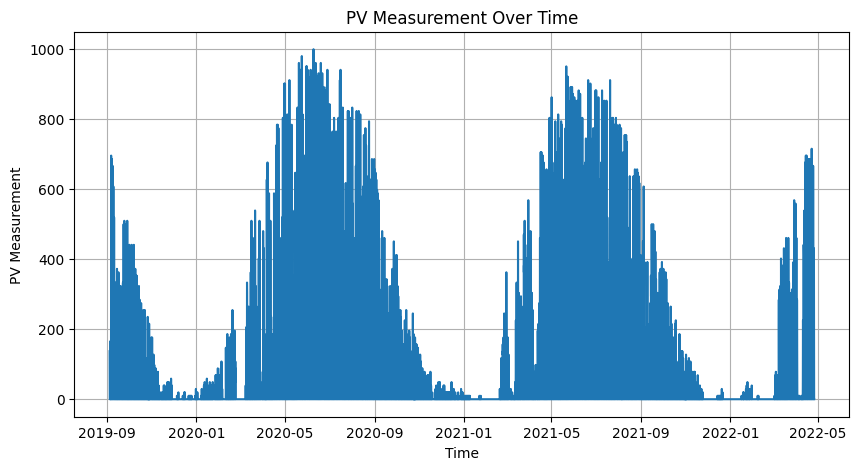

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(training_C['date_forecast'], training_C['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

Her må vi sette inn verdier for 2019; gjennomsnitt av andre år med samme dato ellers

In [85]:
#training_C['pv_measurement'].fillna(1000, inplace=True)

In [86]:
training_C.dropna(subset=['pv_measurement'], inplace=True)
training_B.dropna(subset=['pv_measurement'], inplace=True)

In [87]:
nan_count = training_A.isna().sum()
#print(nan_count)

dataframes = [training_A, training_B, training_C, validation_A, validation_B, validation_C, test_A, test_B, test_C]

# Iterate through the DataFrames and remove the 'snow_density:kgm3' column
for df in dataframes:
    if 'snow_density:kgm3' in df.columns:
        df.drop(columns=['snow_density:kgm3'], inplace=True)
        df.drop(columns=['ceiling_height_agl:m'], inplace=True)
        df.drop(columns=['cloud_base_agl:m'], inplace=True)

### Trains and test h2o model for each location

### A

In [88]:
y_train = training_A['pv_measurement']

X_train = training_A.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_A['pv_measurement']

X_validate = validation_A.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [89]:
# Start an H2O cluster (you can customize cluster settings if needed)
port1 = 54321
h2o.init(port=port1)

# Create H2O data frames for your training and validation data
train = h2o.H2OFrame(X_train.assign(pv_measurement=y_train))
valid = h2o.H2OFrame(X_validate.assign(pv_measurement=y_validate))

# Specify the target variable
y = "pv_measurement"

# Run H2O AutoML with your data
aml = H2OAutoML(max_runtime_secs=300, stopping_metric="mae")
aml.train(y=y, training_frame=train, validation_frame=valid)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 9 mins
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_martevingsnes_zppb9o
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.533 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:22:50.171: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:22:50.174: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

█████
13:23:11.6: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]
13:23:11.736: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
13:23:21.778: _train param, Dropping unused columns: [snow_drift:idx, elevation:m]

█
13:23:22.413: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
13:23:35.540: _train param, Dropping bad and con

key,value
Stacking strategy,cross_validation
Number of base models (used / total),15/24
# GBM base models (used / total),8/11
# XGBoost base models (used / total),4/8
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [90]:
lb = aml.leaderboard
print(lb)

# Access the best model (leader)
best_model = aml.leader
print("Best Model:")
print(best_model)

model_id                                                    rmse     mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_4_20231025_132250     405.41   164357  186.694      nan                    164357
StackedEnsemble_BestOfFamily_4_AutoML_4_20231025_132250  407.305  165897  187.637      nan                    165897
StackedEnsemble_AllModels_1_AutoML_4_20231025_132250     408.884  167186  188.164      nan                    167186
StackedEnsemble_AllModels_2_AutoML_4_20231025_132250     408.92   167216  188.216      nan                    167216
StackedEnsemble_BestOfFamily_2_AutoML_4_20231025_132250  409.362  167577  188.874      nan                    167577
StackedEnsemble_BestOfFamily_3_AutoML_4_20231025_132250  410.756  168720  190.383      nan                    168720
GBM_4_AutoML_4_20231025_132250                           412.706  170326  188.982      nan                    170326
GBM_grid_1_AutoML_4_20231025_132250_model_2              416.667

In [91]:
predictions = best_model.predict(valid)

# Calculate mean absolute error for the predictions
mae = mean_absolute_error(y_validate, predictions.as_data_frame())
print(f"Mean Absolute Error (MAE): {mae}")

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%
Mean Absolute Error (MAE): 128.81519071417534


In [92]:
test_A = test_A.drop(columns=['date_forecast'])
test_A = test_A.drop(columns=['date_calc'])

#loaded_model = h2o.load_model(model_path/best_model)

test_frame = h2o.H2OFrame(test_A)

# Use the loaded model to make predictions on the test data
predictions = best_model.predict(test_frame)

# Convert H2OFrame to a pandas DataFrame for further analysis
predictions_A = h2o.as_list(predictions)

# Close the H2O cluster
h2o.shutdown()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
H2O session _sid_b329 closed.


/var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/ipykernel_14091/1367694336.py:15: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


#### B

In [93]:
y_train = training_B['pv_measurement']

X_train = training_B.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_B['pv_measurement']

X_validate = validation_B.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [94]:
# Start an H2O cluster (you can customize cluster settings if needed)
port2 = 54322
h2o.init(port=port2)

# Create H2O data frames for your training and validation data
train = h2o.H2OFrame(X_train.assign(pv_measurement=y_train))
valid = h2o.H2OFrame(X_validate.assign(pv_measurement=y_validate))

# Specify the target variable
y = "pv_measurement"

# Run H2O AutoML with your data
aml = H2OAutoML(max_runtime_secs=300, stopping_metric="mae")
aml.train(y=y, training_frame=train, validation_frame=valid)

Checking whether there is an H2O instance running at http://localhost:54322..... not found.
Attempting to start a local H2O server...
  Java Version: java version "21.0.1" 2023-10-17 LTS; Java(TM) SE Runtime Environment (build 21.0.1+12-LTS-29); Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)
  Starting server from /Users/martevingsnes/Machine-learning-066/.venv/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/tmpegbhpi69
  JVM stdout: /var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/tmpegbhpi69/h2o_martevingsnes_started_from_python.out
  JVM stderr: /var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/tmpegbhpi69/h2o_martevingsnes_started_from_python.err
  Server is running at http://127.0.0.1:54326
Connecting to H2O server at http://127.0.0.1:54326 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_martevingsnes_93u1nj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.984 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:28:00.16: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:28:00.55: _train param, Dropping bad and constant columns: [elevation:m]

██████
13:28:26.958: _train param, Dropping bad and constant columns: [elevation:m]

█
13:28:28.553: _train param, Dropping bad and constant columns: [elevation:m]

██
13:28:40.61: _train param, Dropping unused columns: [elevation:m]
13:28:41.116: _train param, Dropping bad and constant columns: [elevation:m]

█████
13:29:04.101: _train param, Dropping bad and constant columns: [elevation:m]

████████
13:29:42.656: _train param, Dropping b

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/20
# GBM base models (used / total),3/8
# XGBoost base models (used / total),4/6
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),0/3
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [95]:
lb = aml.leaderboard
print(lb)

# Access the best model (leader)
best_model = aml.leader
print("Best Model:")
print(best_model)

model_id                                                    rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20231025_132759     72.9527  5322.1   35.6434      nan                   5322.1
StackedEnsemble_AllModels_2_AutoML_1_20231025_132759     73.7135  5433.69  36.0797      nan                   5433.69
StackedEnsemble_AllModels_1_AutoML_1_20231025_132759     73.7594  5440.45  36.0987      nan                   5440.45
StackedEnsemble_BestOfFamily_3_AutoML_1_20231025_132759  73.8808  5458.38  36.1722      nan                   5458.38
StackedEnsemble_BestOfFamily_2_AutoML_1_20231025_132759  73.8969  5460.76  36.1711      nan                   5460.76
StackedEnsemble_BestOfFamily_4_AutoML_1_20231025_132759  74.0398  5481.89  36.3693      nan                   5481.89
GBM_4_AutoML_1_20231025_132759                           74.6196  5568.08  36.9265      nan                   5568.08
GBM_grid_1_AutoML_1_20231025_132759_model_1              

In [96]:
predictions = best_model.predict(valid)

# Calculate mean absolute error for the predictions
mae = mean_absolute_error(y_validate, predictions.as_data_frame())
print(f"Mean Absolute Error (MAE): {mae}")

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%
Mean Absolute Error (MAE): 20.235424172268214


In [97]:
test_B = test_B.drop(columns=['date_forecast'])
test_B = test_B.drop(columns=['date_calc'])

#loaded_model = h2o.load_model(model_path_B)

test_frame = h2o.H2OFrame(test_B)

# Use the loaded model to make predictions on the test data
predictions = best_model.predict(test_frame)

# Convert H2OFrame to a pandas DataFrame for further analysis
predictions_B = h2o.as_list(predictions)

# Close the H2O cluster
h2o.shutdown()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
H2O session _sid_a810 closed.


/var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/ipykernel_14091/1673757164.py:15: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


#### C

In [98]:
y_train = training_C['pv_measurement']

X_train = training_C.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_C['pv_measurement']

X_validate = validation_C.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [99]:
# Start an H2O cluster (you can customize cluster settings if needed)
port3 = 54323
h2o.init(port=port3)

# Create H2O data frames for your training and validation data
train = h2o.H2OFrame(X_train.assign(pv_measurement=y_train))
valid = h2o.H2OFrame(X_validate.assign(pv_measurement=y_validate))

# Specify the target variable
y = "pv_measurement"

# Run H2O AutoML with your data
aml = H2OAutoML(max_runtime_secs=300, stopping_metric="mae")
aml.train(y=y, training_frame=train, validation_frame=valid)

Checking whether there is an H2O instance running at http://localhost:54323. connected.


H2O_cluster_uptime:,1 hour 44 mins
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_martevingsnes_nza8y6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.388 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:33:04.185: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:33:04.196: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

████
13:33:20.325: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]
13:33:21.519: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
13:33:31.95: _train param, Dropping unused columns: [snow_drift:idx, elevation:m]

█
13:33:32.393: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
13:33:43.892: _train param, Dropping bad and con

key,value
Stacking strategy,cross_validation
Number of base models (used / total),21/28
# GBM base models (used / total),10/12
# XGBoost base models (used / total),7/8
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),2/5
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [100]:
lb = aml.leaderboard
print(lb)

# Access the best model (leader)
best_model = aml.leader
print("Best Model:")
print(best_model)

model_id                                                    rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_4_AutoML_2_20231025_133304     48.6842  2370.15  19.767       nan                   2370.15
StackedEnsemble_AllModels_3_AutoML_2_20231025_133304     48.6891  2370.63  19.7509      nan                   2370.63
StackedEnsemble_BestOfFamily_4_AutoML_2_20231025_133304  49.0344  2404.37  19.9171      nan                   2404.37
StackedEnsemble_AllModels_1_AutoML_2_20231025_133304     49.6594  2466.06  20.2648      nan                   2466.06
StackedEnsemble_AllModels_2_AutoML_2_20231025_133304     49.6761  2467.72  20.2883      nan                   2467.72
GBM_grid_1_AutoML_2_20231025_133304_model_4              49.7881  2478.86  19.9953      nan                   2478.86
StackedEnsemble_BestOfFamily_2_AutoML_2_20231025_133304  49.933   2493.31  20.4566      nan                   2493.31
StackedEnsemble_BestOfFamily_3_AutoML_2_20231025_133304 

In [101]:
predictions = best_model.predict(valid)

# Calculate mean absolute error for the predictions
mae = mean_absolute_error(y_validate, predictions.as_data_frame())
print(f"Mean Absolute Error (MAE): {mae}")

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Mean Absolute Error (MAE): 27.677888486673545


In [102]:
test_C = test_C.drop(columns=['date_forecast'])
test_C = test_C.drop(columns=['date_calc'])

#loaded_model = h2o.load_model(model_path_C)

test_frame = h2o.H2OFrame(test_C)

# Use the loaded model to make predictions on the test data
predictions = best_model.predict(test_frame)

# Convert H2OFrame to a pandas DataFrame for further analysis
predictions_C = h2o.as_list(predictions)

# Close the H2O cluster
h2o.shutdown()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
H2O session _sid_9807 closed.


/var/folders/gp/vqql8_v1253_d8bwfqk_0gb40000gn/T/ipykernel_14091/3352725367.py:15: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


### Testing

In [103]:
test_pred_all = np.concatenate((predictions_A, predictions_B, predictions_C), axis=0)

test_pred_all2 = np.where(test_pred_all < 0, 0, test_pred_all)

In [104]:
test3 = pd.read_csv('../test.csv')
sample_submission = pd.read_csv('../sample_submission.csv')
test3['prediction'] = test_pred_all2
sample_submission = sample_submission[['id']].merge(test3[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('../Submissions/submission_32.csv', index=False)